# Author : Cicy K Agnes

EV Startup [Conversion : Diesel/Petrol Vehicles-> EV]

->    since EV vehicles are yet to be introduced on full scale in India,

->    we will first focus on existing petrol and diesel vehicles related data

->    collect data on/identify urban areas with high concentration of vehicle use/purchase
                  -which will help simplify our geographic segmentation

->    for psychographic segmentation, we can focus on data such as average income of a region etc.

->    for demographic we can use previous census data to segment the individuals most likely to purchase vehicles

# Demographic Analysis

In [128]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
print("Loading data...")
data = pd.read_csv("/content/gdrive/My Drive/datasets/Indian automoble buying behavour study 1.0.csv", encoding= "ISO-8859-1") 
print("loaded data") 

Loading data...
loaded data


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [132]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [133]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [134]:
data.shape

(99, 13)

In [135]:
data.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [136]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

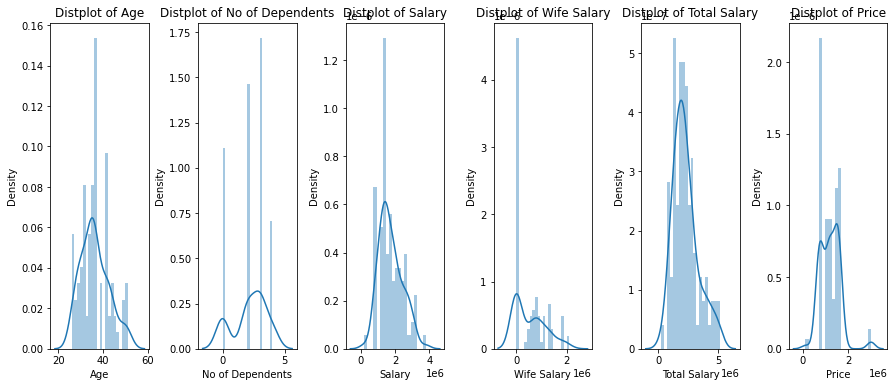

In [137]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

Age group between 25 to 50 has the highest density.

Most people have a total salary of 30 lakh

Wives of most of the people are unemployed

Most people spent around 10 to 20 lakhs for cars 

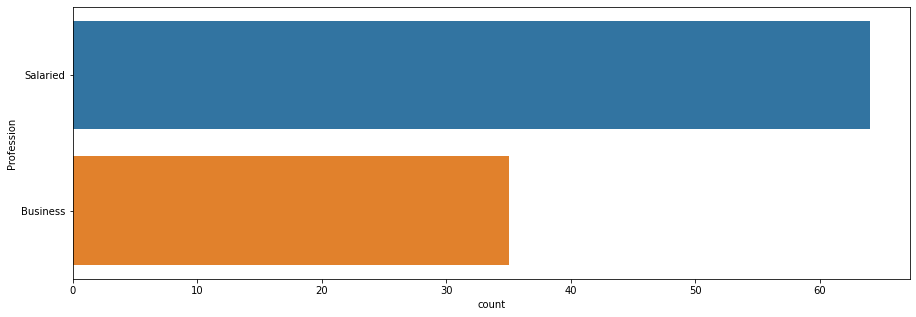

In [138]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profession',data=data)
plt.show()

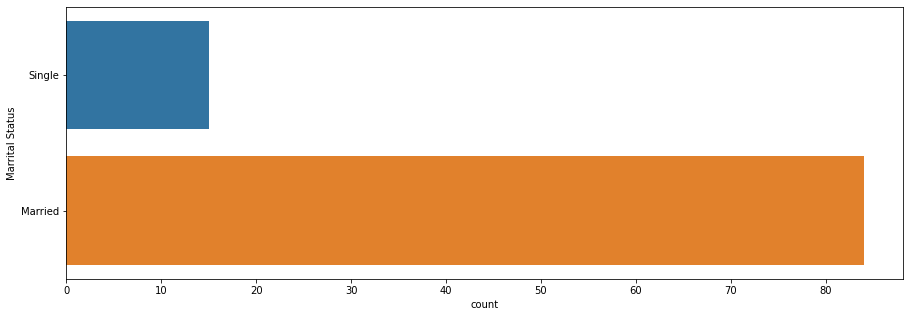

In [139]:
plt.figure(figsize=(15,5))
sns.countplot(y='Marrital Status',data=data)
plt.show()

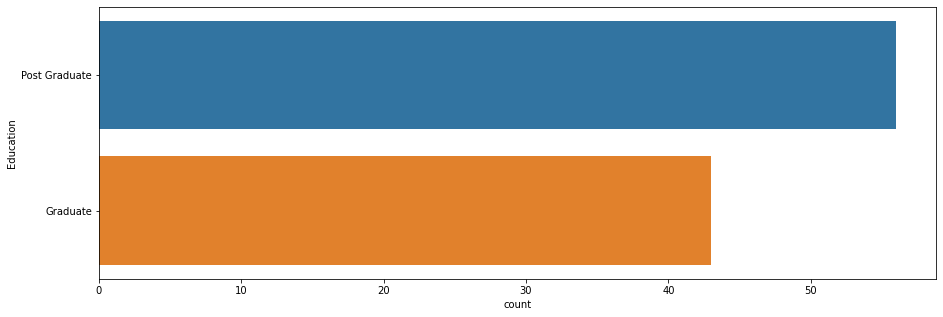

In [140]:
plt.figure(figsize=(15,5))
sns.countplot(y='Education',data=data)
plt.show()

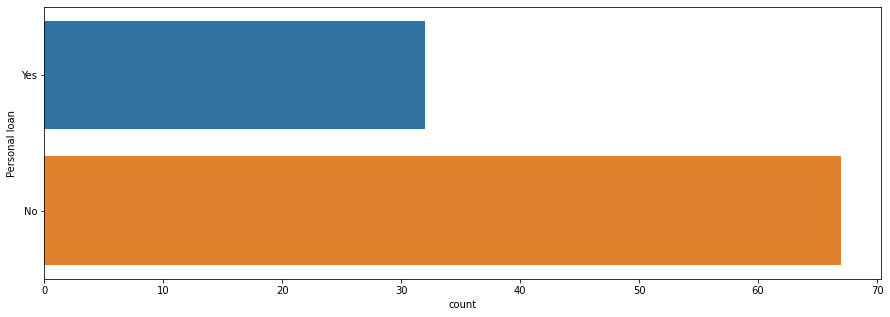

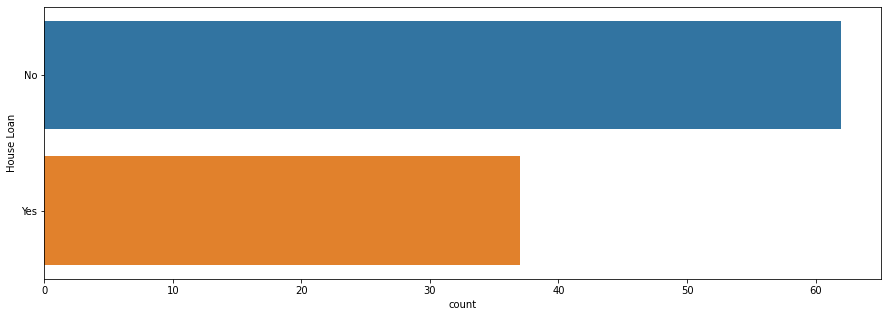

In [141]:
plt.figure(figsize=(15,5))
sns.countplot(y='Personal loan',data=data)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(y='House Loan',data=data)
plt.show()

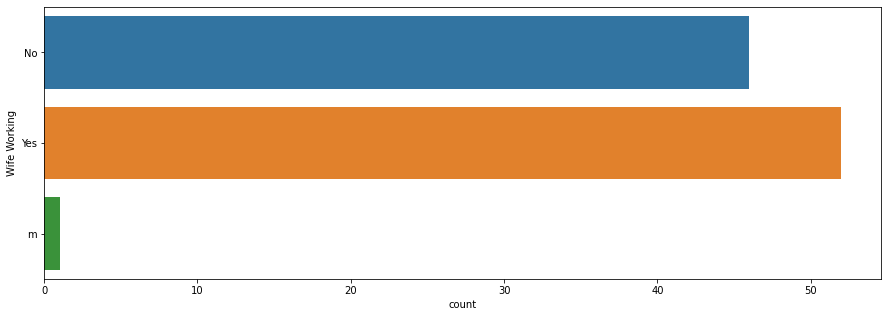

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=data)
plt.show()

We got a typo in one of the values in Wife Working field.
Correct the column with 'Wife Working' = m to No

In [143]:
data.loc[data['Wife Working'] == 'm']   

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [144]:
data=data.replace(to_replace ="m",
                 value ="No")

In [145]:
data.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


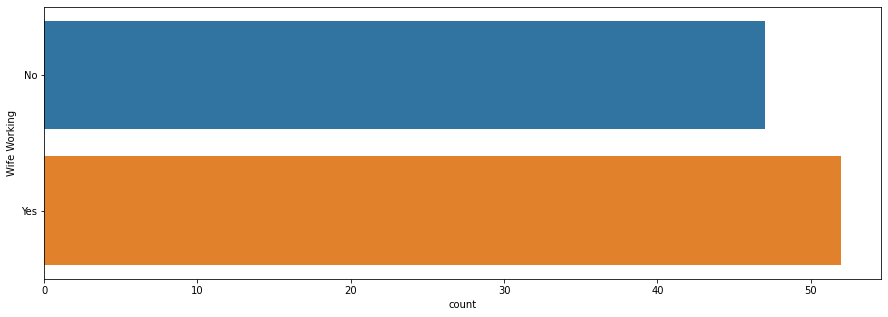

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=data)
plt.show()

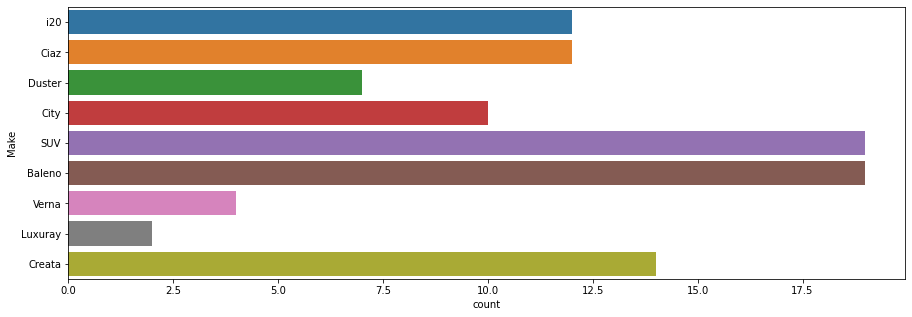

In [147]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=data)
plt.show()

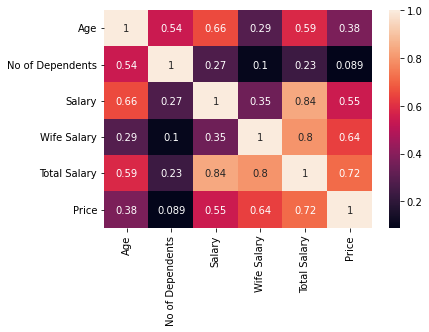

In [148]:
sns.heatmap(data.corr(), annot=True)

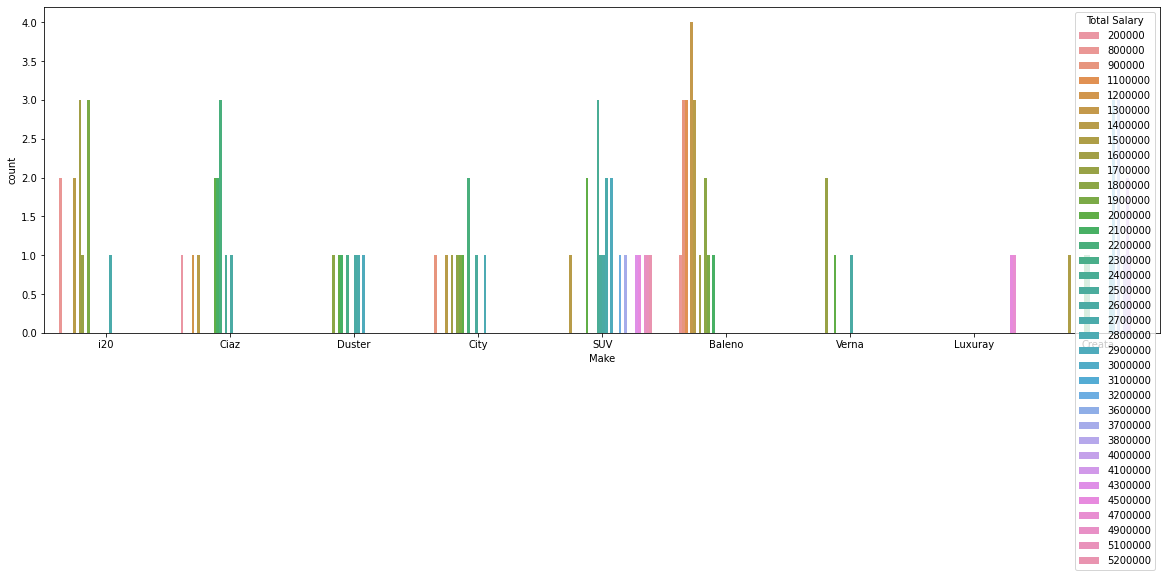

In [149]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Total Salary")

A scatter plot of total salary against the price of the car owned.


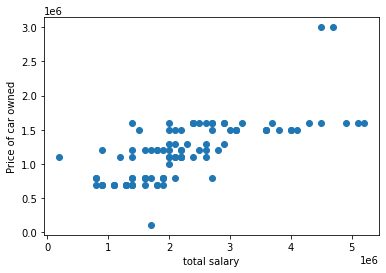

In [150]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(data['Total Salary'],data['Price'])

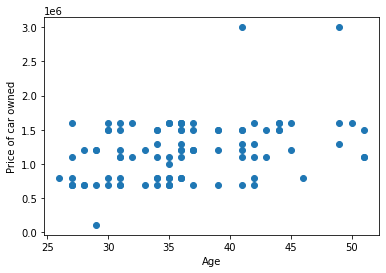

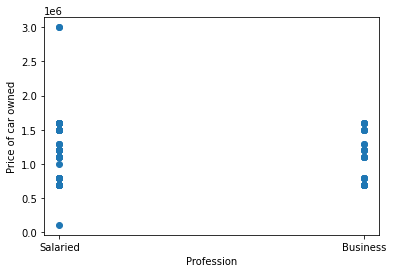

In [151]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(data['Age'],data['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(data['Profession'],data['Price'])
plt.show()

In [152]:

from sklearn.preprocessing import LabelEncoder


cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [153]:
data_price = data.drop('Make',axis=1)
data_price.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [154]:

data_car = data.drop('Price',axis=1)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,i20
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV


In [155]:
le = LabelEncoder()
data_car.Make = le.fit_transform(data_car.Make)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6


# Clustering According to the price of the vehicle owned

In [156]:
features = list(data_price.columns)
d = data_price[features] 

In [157]:
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Price']

Randomly set k as 2. (Simply to find what will happen)

In [158]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
d['clusters'] = clustering_kmeans.fit_predict(d) 

In [159]:
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,27,1,1,1,0,1,0,0,800000,0,800000,800000,0
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000,0
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000,0
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000,0
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,1600000,0
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,1600000,1
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1100000,0
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,1500000,1


Text(0, 0.5, 'Total salary')

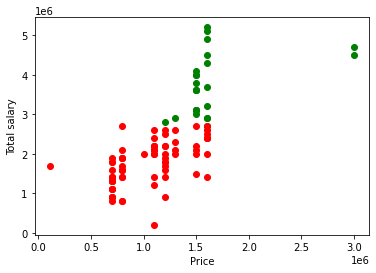

In [160]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

Scale the data using minmaxscaler

In [161]:
from sklearn.preprocessing import MinMaxScaler
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

In [162]:

x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled

In [163]:

x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled


x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled


x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

In [164]:

d['clusters'] = clustering_kmeans.fit_predict(d) 
d


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,0


Text(0, 0.5, 'Total salary')

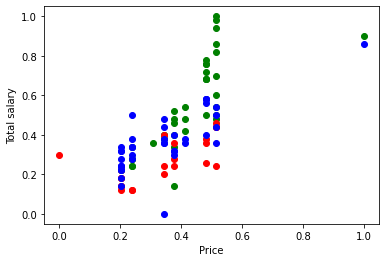

In [165]:

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 


d1 = d[d.clusters==1]
d0 = d[d.clusters==0]

d2 = d[d.clusters==2]
#d3 = d[d.clusters==3]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.scatter(d2.Price, d2['Total Salary'],color='blue')
#plt.scatter(d3.Price, d3['Total Salary'],color='black')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [166]:
clustering_kmeans.cluster_centers_

array([[ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  1.33226763e-15,  1.81818182e-01,
         0.00000000e+00,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01,
         1.00000000e+00],
       [ 4.95789474e-01,  7.89473684e-01,  5.26315789e-02,
         6.84210526e-01,  2.23684211e+00,  2.89473684e-01,
         5.00000000e-01,  7.10526316e-01,  5.15350877e-01,
         4.19799499e-01,  5.47368421e-01,  4.27244582e-01,
        -2.77555756e-17],
       [ 4.86153846e-01,  5.12820513e-01,  8.32667268e-17,
         4.61538462e-01,  3.35897436e+00,  4.35897436e-01,
         4.61538462e-01,  4.10256410e-01,  4.18091168e-01,
         1.61172161e-01,  3.68717949e-01,  3.46996717e-01,
         0.00000000e+00]])

In [167]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d)
  sse.append(km.inertia_)

In [168]:
sse

[386.27047320856985,
 198.6608300455424,
 148.31232376911623,
 131.58013171679679,
 117.9114937953922,
 107.64283187506189,
 99.52079281223138,
 94.01794627727662,
 86.73161597977031]

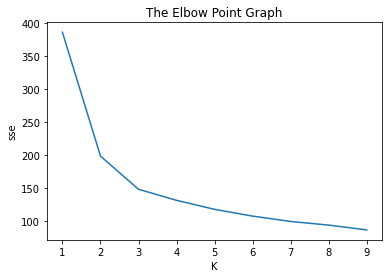

In [169]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

Here elbow can be taken as three.

In [170]:



def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

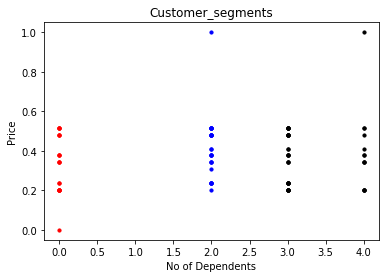

In [171]:
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"]) 

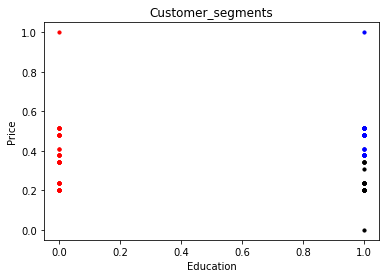

In [172]:

clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"]) 

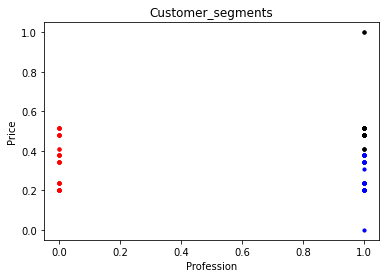

In [173]:

clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"]) 

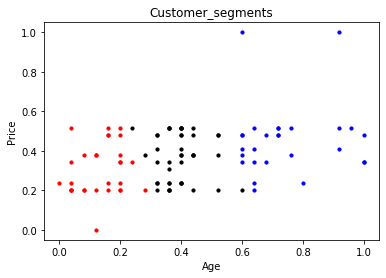

In [174]:

clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

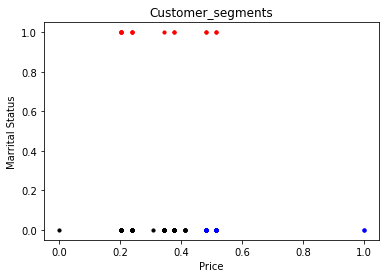

In [175]:
clus = d.loc[:,["Price","Marrital Status"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Price","Marrital Status"]) 

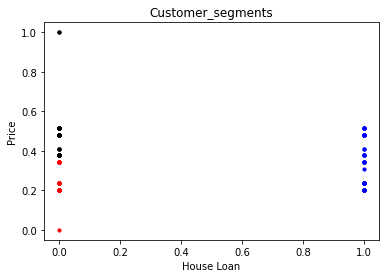

In [176]:
clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"]) 

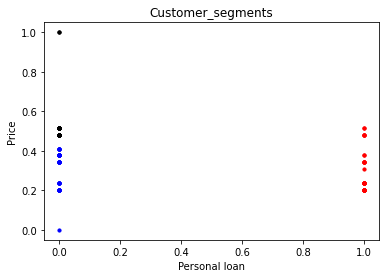

In [177]:
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"]) 

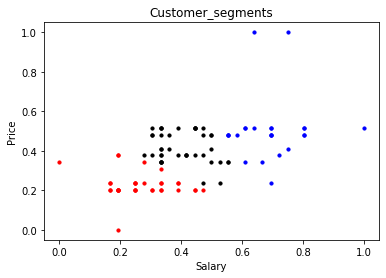

In [178]:
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"]) 

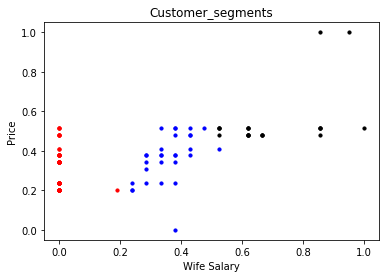

In [179]:
clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"]) 

In [197]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
d['clusters'] = clustering_kmeans.fit_predict(d) 


In [198]:
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,0


In [199]:
labels = clustering_kmeans.labels_

In [200]:
labels

array([1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

3 dimentional visualization - Age, Salary, Price

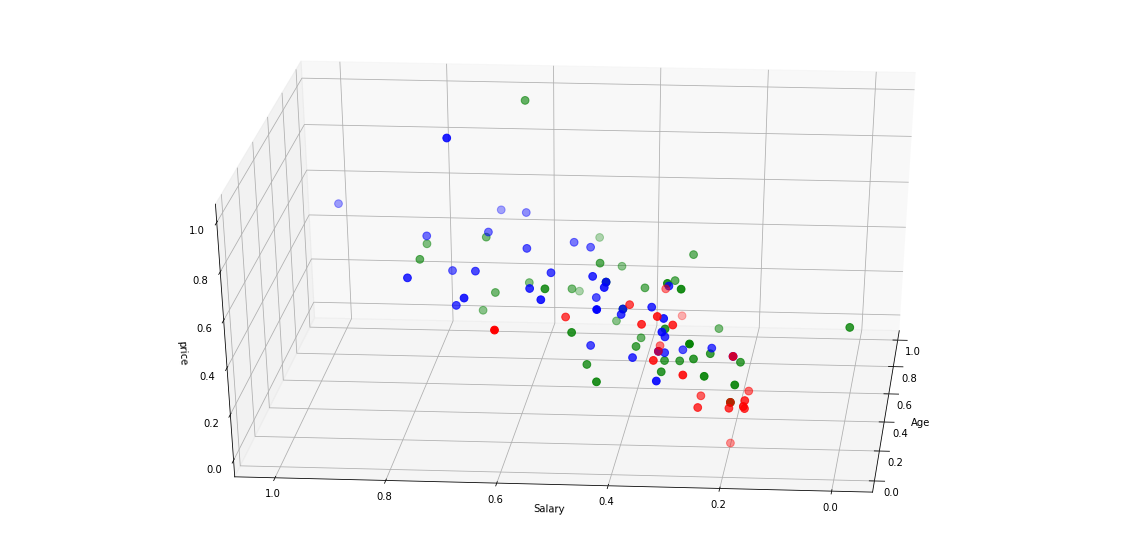

In [202]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

3 -D PLOT - PRICE, NO OF DEPENDENTS, TOTAL SALARY

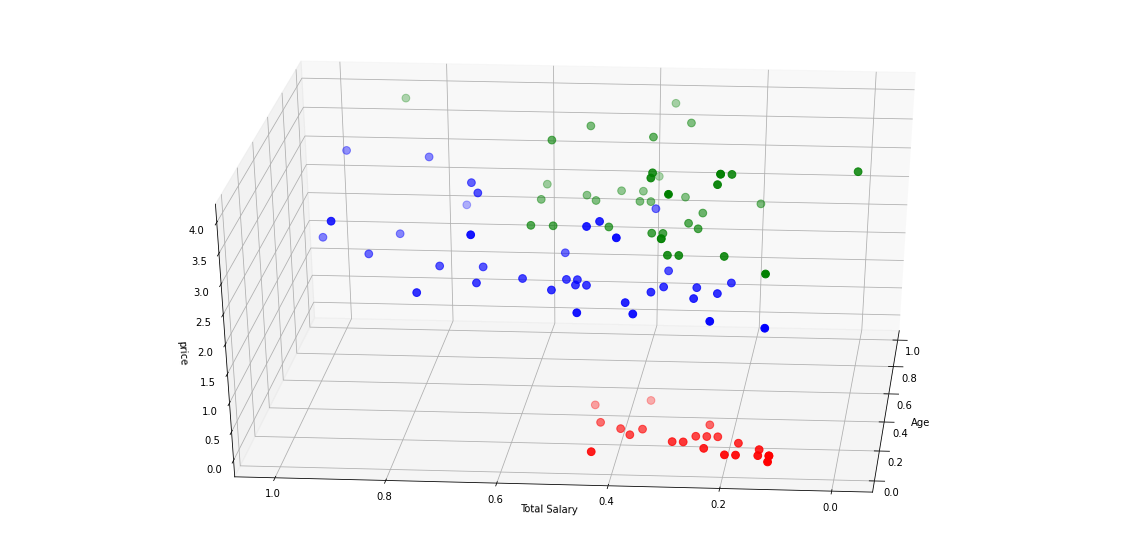

In [204]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

# Observations: 



1.   We found that 3 clusters groups can be formed from the data given(based on price of the vehicle) using the K-Means algorithm and Elbow Point Method
2.   While looking at the patterns, we find that as the Age increases the cost of the vehicle also rises.
3.   Also, amount spent on the car goes up with the number of dependents. The same is true for salary field too.
4.  The visualizations provided gives a clear idea about the patterns.



# Clustering According to the type and model of the vehicle owned

In [98]:
feature = list(data_car.columns)
dc = data_car[feature] 

In [99]:
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3


In [101]:

x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled




In [102]:
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,8
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,1
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,4
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,6
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,6
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,1
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,3


In [109]:
k_range1 = range(1,10)
#sum of squared error
ssec = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(dc)
  ssec.append(km.inertia_)

In [110]:
ssec

[1076.568039936783,
 480.4043865992121,
 375.1105031533179,
 288.12788945790317,
 237.25907368379734,
 202.73577880733686,
 187.93445286674793,
 174.76377596698134,
 164.63867965380575]

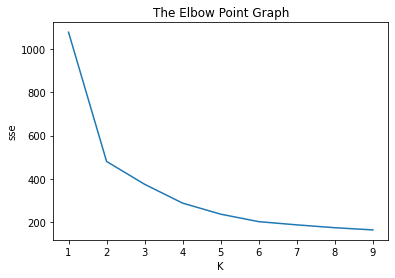

In [111]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

Here the elbow point can be taken an 2


In [190]:
def plotsegm(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

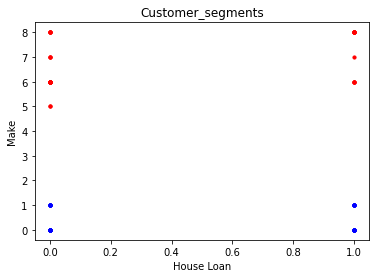

In [192]:
clus = dc.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Make"])

Displaying the rows in same clusters at one place(According to price)

In [186]:
p=d[d.clusters==1]
p


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1
13,0.16,0,1,1,2,1,0,0,0.333333,0.000000,0.24,0.238754,1
18,0.12,1,1,1,2,0,0,0,0.194444,0.000000,0.14,0.377163,1
20,0.44,1,0,1,3,0,1,1,0.416667,0.380952,0.46,0.377163,1
25,0.36,1,0,0,2,0,0,1,0.444444,0.523810,0.54,0.515571,1
28,0.40,1,0,1,3,1,1,1,0.416667,0.428571,0.48,0.377163,1
29,0.40,1,0,1,2,0,0,1,0.444444,0.428571,0.50,0.515571,1
35,0.64,1,0,1,3,0,0,1,0.611111,0.619048,0.70,0.515571,1
43,0.32,1,0,1,3,0,0,1,0.333333,0.428571,0.42,0.411765,1


In [187]:
p.shape

(38, 13)

In [182]:
q=d[d.clusters==0]
q

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0
12,0.12,1,0,1,0,0,0,1,0.194444,0.380952,0.30,0.000000,0
16,0.00,1,1,1,0,0,0,0,0.166667,0.000000,0.12,0.238754,0
17,0.04,1,1,0,0,1,0,1,0.166667,0.000000,0.12,0.204152,0
19,0.16,1,0,0,0,0,0,1,0.166667,0.238095,0.22,0.204152,0
36,0.12,0,0,1,0,0,0,1,0.194444,0.333333,0.28,0.377163,0
37,0.16,1,0,1,0,0,0,1,0.305556,0.380952,0.38,0.480969,0
38,0.16,0,1,1,0,0,0,0,0.333333,0.000000,0.24,0.515571,0
39,0.20,1,0,0,0,0,0,1,0.333333,0.380952,0.40,0.342561,0
41,0.24,0,0,1,0,0,0,0,0.333333,0.000000,0.24,0.342561,0


In [188]:
q.shape

(22, 13)

In [183]:
r=d[d.clusters==2]
r

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,2
5,0.08,1,0,0,3,1,1,0,0.194444,0.000000,0.14,0.204152,2
6,0.20,1,0,0,4,0,0,1,0.277778,0.285714,0.32,0.377163,2
7,0.28,0,0,1,4,0,0,0,0.333333,0.000000,0.24,0.204152,2
8,0.32,0,0,1,4,0,0,0,0.500000,0.000000,0.36,0.342561,2
9,0.32,1,0,0,3,1,1,1,0.277778,0.333333,0.34,0.238754,2
10,0.36,1,0,1,4,0,0,1,0.305556,0.333333,0.36,0.515571,2
11,0.36,1,0,0,4,1,1,0,0.333333,0.000000,0.24,0.204152,2
14,0.20,0,0,0,3,1,1,1,0.194444,0.190476,0.22,0.204152,2


In [189]:
r.shape

(39, 13)

Cluster 0 - 22 rows

Cluster 1 - 38 rows

Cluster 2 - 39 rows

Out of a total of 99 rows